In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
ipl_auction_df = pd.read_csv('IPL IMB381IPL2013.csv')
ipl_auction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

In [4]:
X_features = ['AGE', 'COUNTRY', 'PLAYING ROLE', 'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
              'CAPTAINCY EXP', 'RUNS-S', 'HS','AVE','SR-B','SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL', 'ECON',
              'SR-BL']

In [5]:
categorical_features = ['AGE', 'COUNTRY', 'PLAYING ROLE', 'CAPTAINCY EXP']
ipl_auction_encoded_df = pd.get_dummies(ipl_auction_df[X_features], columns = categorical_features, drop_first = True)

In [6]:
ipl_auction_encoded_df.columns

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [7]:
X = ipl_auction_encoded_df
Y = ipl_auction_df['SOLD PRICE']

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(X)
Y = (Y - Y.mean())/Y.std()

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.2, random_state = 42)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
linreg.coef_

array([-0.43539611, -0.04632556,  0.50840867, -0.03323988,  0.2220377 ,
       -0.05065703,  0.17282657, -0.49173336,  0.58571405, -0.11654753,
        0.24880095,  0.09546057,  0.16428731,  0.26400753, -0.08253341,
       -0.28643889, -0.26842214, -0.21910913, -0.02622351,  0.24817898,
        0.18760332,  0.10776084,  0.04737488,  0.05191335,  0.01235245,
        0.00547115, -0.03124706,  0.08530192,  0.01790803, -0.05077454,
        0.18745577])

In [14]:
columns_coef_df = pd.DataFrame( {'columns': ipl_auction_encoded_df.columns, 'coef': linreg.coef_})

In [15]:
sorted_coef_vals = columns_coef_df.sort_values('coef', ascending = False)

Text(0, 0.5, 'Features')

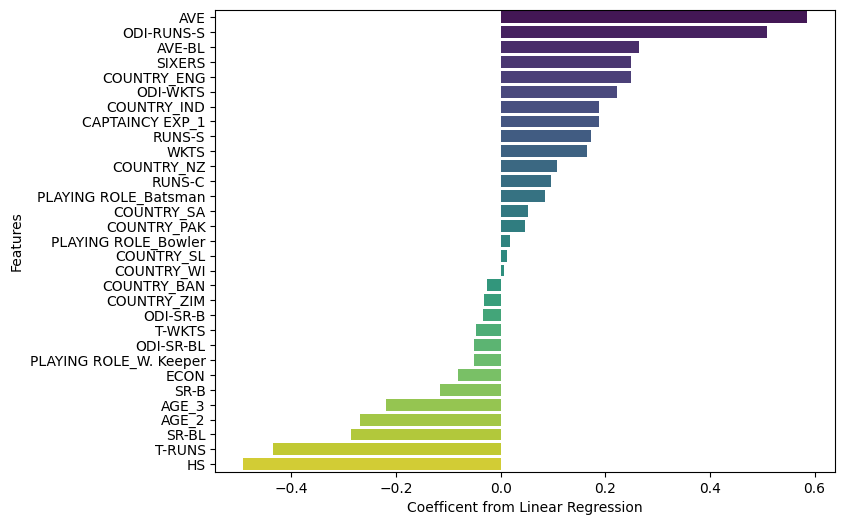

In [16]:
plt.figure(figsize = (8,6))
sns.barplot( x = "coef", y = "columns", data = sorted_coef_vals, palette="viridis" );
plt.xlabel("Coefficent from Linear Regression")
plt.ylabel("Features")

In [17]:
from sklearn import metrics
def get_train_test_rmse( model ):
    y_train_pred = model.predict( X_train )
    rmse_train = round(np.sqrt(metrics.mean_squared_error( y_train, y_train_pred)), 3)
    y_test_pred = model.predict( X_test )
    rmse_test = round(np.sqrt(metrics.mean_squared_error( y_test, y_test_pred)), 3)
    print( "train: ", rmse_train, " test:", rmse_test )

In [18]:
get_train_test_rmse(linreg)

train:  0.679  test: 0.749


#### Ridge Regression(L2 Penalty)

In [20]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 1, max_iter = 500)
ridge.fit(X_train, y_train)

,alpha,1
,fit_intercept,True
,copy_X,True
,max_iter,500
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [21]:
get_train_test_rmse(ridge)

train:  0.68  test: 0.724


In [22]:
ridge = Ridge(alpha = 2.0, max_iter = 1000)
ridge.fit(X_train, y_train)
get_train_test_rmse(ridge)

train:  0.682  test: 0.706


#### LASSO Regression(L1 Penalty)

In [24]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.01, max_iter = 500)
lasso.fit(X_train, y_train)

,alpha,0.01
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,500
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [25]:
get_train_test_rmse(lasso)

train:  0.688  test: 0.698


In [26]:
## filtering the features with zero coefficients
lasso_coeff_df = pd.DataFrame({'columns': ipl_auction_encoded_df.columns,
                               'coef': lasso.coef_})

In [27]:
lasso_coeff_df[lasso_coeff_df.coef == 0]

,columns,coef
1,T-WKTS,-0.0
3,ODI-SR-B,-0.0
13,AVE-BL,-0.0
28,PLAYING ROLE_Bowler,0.0


#### Elastic Net Regression

In [29]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha = 1.01, l1_ratio = 0.001, max_iter = 500)
enet.fit(X_train, y_train)
get_train_test_rmse(enet)

train:  0.789  test: 0.665


## Advance Machine Learning Algorithms

In [31]:
bank_df = pd.read_csv('bank.csv')
bank_df.head(5)

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no


In [32]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                4521 non-null   int64 
 1   job                4521 non-null   object
 2   marital            4521 non-null   object
 3   education          4521 non-null   object
 4   default            4521 non-null   object
 5   balance            4521 non-null   int64 
 6   housing-loan       4521 non-null   object
 7   personal-loan      4521 non-null   object
 8   current-campaign   4521 non-null   int64 
 9   previous-campaign  4521 non-null   int64 
 10  subscribed         4521 non-null   object
dtypes: int64(4), object(7)
memory usage: 388.6+ KB


In [33]:
bank_df.subscribed.value_counts()

subscribed
no     4000
yes     521
Name: count, dtype: int64

In [34]:
# Importing resample from *sklearn.utils* package.
from sklearn.utils import resample
# Separate the case of yes-subscribes and no-subscribes
bank_subscribed_no = bank_df[bank_df.subscribed == 'no']
bank_subscribed_yes = bank_df[bank_df.subscribed == 'yes']
##Upsample the yes-subscribed cases.
df_minority_upsampled = resample(bank_subscribed_yes,
replace=True, # sample with replacement
n_samples=2000)
# Combine majority class with upsampled minority class
new_bank_df = pd.concat([bank_subscribed_no, df_minority_upsampled])

In [35]:
from sklearn.utils import shuffle
new_bank_df = shuffle(new_bank_df)

In [36]:
# Assigning list of all column names in the DataFrame
X_features = list( new_bank_df.columns )
# Remove the response variable from the list
X_features.remove( 'subscribed' )
X_features

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing-loan',
 'personal-loan',
 'current-campaign',
 'previous-campaign']

In [37]:
## get_dummies() will convert all the columns with data type as objects
encoded_bank_df = pd.get_dummies( new_bank_df[X_features], drop_first = True )
X = encoded_bank_df

In [38]:
# Encoding the subscribed column and assigning to Y
Y = new_bank_df.subscribed.map( lambda x: int( x == 'yes') )

In [39]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split( X,
Y,
test_size = 0.3,
random_state = 42 )

In [40]:
from sklearn.linear_model import LogisticRegression
## Initializing the model
logit = LogisticRegression()
## Fitting the model with X and Y values of the dataset
logit.fit( train_X, train_y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [41]:
pred_y = logit.predict(test_X)

In [42]:
from sklearn import metrics
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, labels = [1,0] )
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels = ["Subscribed", "Not Subscribed"] ,
               yticklabels = ["Subscribed", "Not Subscribed"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

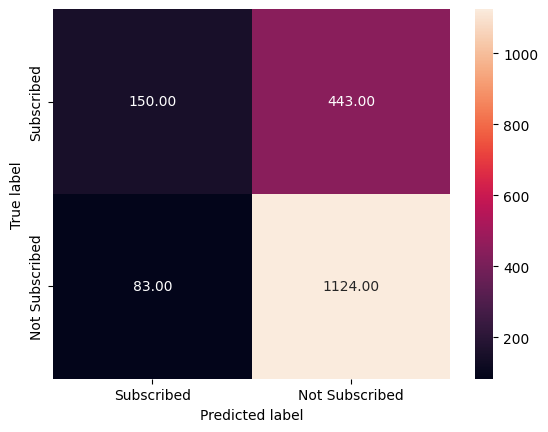

In [43]:
cm = draw_cm( test_y, pred_y )
cm

In [44]:
print(metrics.classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81      1207
           1       0.64      0.25      0.36       593

    accuracy                           0.71      1800
   macro avg       0.68      0.59      0.59      1800
weighted avg       0.69      0.71      0.66      1800



In [45]:
predict_proba_df = pd.DataFrame( logit.predict_proba( test_X ) )
predict_proba_df.head()

,0,1
0,0.872999,0.127001
1,0.573639,0.426361
2,0.823353,0.176647
3,0.457159,0.542841
4,0.607761,0.392239


In [46]:
## Initializing the DataFrame with actual class lables
test_results_df = pd.DataFrame( { 'actual': test_y } )
test_results_df = test_results_df.reset_index()
## Assigning the probability values for class label 1
test_results_df['chd_1'] = predict_proba_df.iloc[:,1:2]

In [47]:
test_results_df.head(5)

,index,actual,chd_1
0,2241,0,0.127001
1,3486,0,0.426361
2,2061,0,0.176647
3,1719,1,0.542841
4,3652,1,0.392239


In [48]:
auc_score = metrics.roc_auc_score( test_results_df.actual, test_results_df.chd_1)
round( float( auc_score ), 2 )

0.69

In [49]:
def draw_roc_curve( model, test_X, test_y ):
    test_results_df = pd.DataFrame( { 'actual': test_y } )
    test_results_df = test_results_df.reset_index()
    predict_proba_df = pd.DataFrame( model.predict_proba( test_X ) )
    test_results_df['chd_1'] = predict_proba_df.iloc[:,1:2]
    fpr, tpr, thresholds = metrics.roc_curve( test_results_df.actual,
    test_results_df.chd_1,
    drop_intermediate = False )
    auc_score = metrics.roc_auc_score( test_results_df.actual, test_results_df.chd_1 )
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    return auc_score, fpr, tpr, thresholds

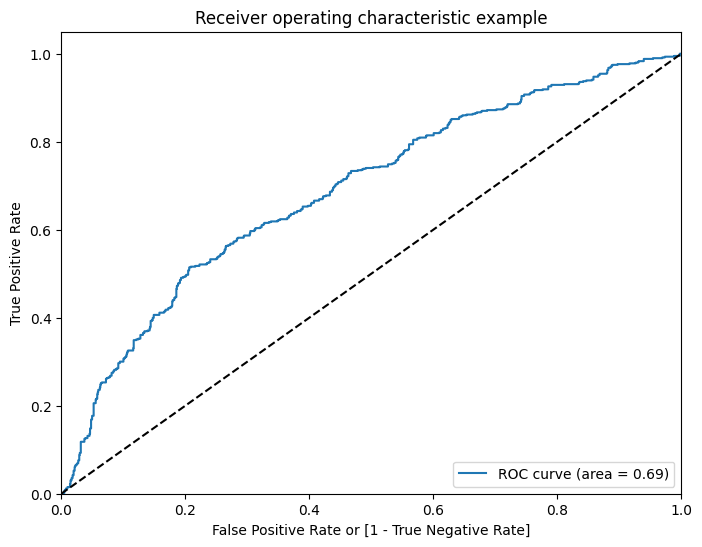

In [50]:
_, _, _, _ = draw_roc_curve( logit, test_X, test_y )

## KNN Algo

In [52]:
## Importing the KNN classifier algorithm
from sklearn.neighbors import KNeighborsClassifier
## Initializing the classifier
knn_clf = KNeighborsClassifier()
## Fitting the model with the training set
knn_clf.fit( train_X, train_y )

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


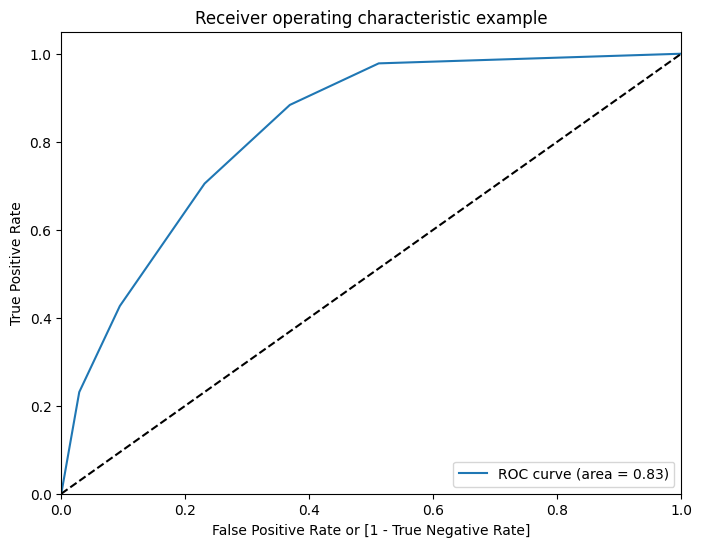

In [53]:
## Invoking draw_roc_curve with the KNN model
_, _, _, _ = draw_roc_curve( knn_clf, test_X, test_y )

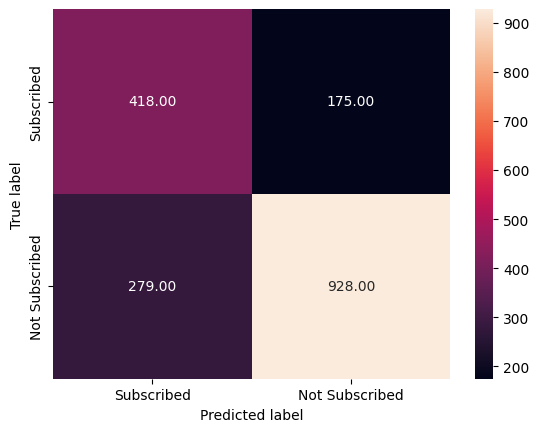

In [54]:
## Predicting on test set
pred_y = knn_clf.predict(test_X)
## Drawing the confusion matrix for KNN model
draw_cm( test_y, pred_y )

In [55]:
print( metrics.classification_report( test_y, pred_y ) )

              precision    recall  f1-score   support

           0       0.84      0.77      0.80      1207
           1       0.60      0.70      0.65       593

    accuracy                           0.75      1800
   macro avg       0.72      0.74      0.73      1800
weighted avg       0.76      0.75      0.75      1800



In [56]:
## Importing GridSearchCV
from sklearn.model_selection import GridSearchCV
## Creating a dictionary with hyperparameters and possible values for searching
tuned_parameters = [{'n_neighbors': range(5,10),
'metric': ['canberra', 'euclidean', 'minkowski']}]
## Configuring grid search
clf = GridSearchCV(KNeighborsClassifier(),
tuned_parameters,
cv=10,
scoring='roc_auc')
## fit the search with training set
clf.fit(train_X, train_y )

,estimator,KNeighborsClassifier()
,param_grid,"[{'metric': ['canberra', 'euclidean', ...], 'n_neighbors': range(5, 10)}]"
,scoring,'roc_auc'
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,5


In [57]:
clf.best_score_

0.8250518728234069

In [58]:
clf.best_params_

{'metric': 'canberra', 'n_neighbors': 5}

In [59]:
clf.cv_results_

{'mean_fit_time': array([0.0111033 , 0.00990562, 0.01092477, 0.00864956, 0.00895822,
        0.00871046, 0.00826972, 0.00626011, 0.00908618, 0.00851605,
        0.01049008, 0.00853803, 0.0087254 , 0.00749798, 0.01103487]),
 'std_fit_time': array([0.00314969, 0.00217756, 0.00547826, 0.00502957, 0.00554739,
        0.00331945, 0.00779488, 0.00651468, 0.00624067, 0.00507478,
        0.00421449, 0.00656132, 0.00585384, 0.00519677, 0.00321137]),
 'mean_score_time': array([0.10377538, 0.10408039, 0.10042877, 0.11145105, 0.10392547,
        0.08534589, 0.08848314, 0.08833659, 0.0864269 , 0.09434094,
        0.08909919, 0.08865354, 0.08837354, 0.09320207, 0.10844972]),
 'std_score_time': array([0.00793489, 0.0068947 , 0.00654698, 0.00894275, 0.0087027 ,
        0.00367077, 0.00777154, 0.0099265 , 0.00852304, 0.00739332,
        0.00639485, 0.00869098, 0.00720004, 0.00701557, 0.01277137]),
 'param_metric': masked_array(data=['canberra', 'canberra', 'canberra', 'canberra',
                    'c

In [60]:
from sklearn.ensemble import RandomForestClassifier

radm_clf = RandomForestClassifier(max_depth = 10, n_estimators = 10)
radm_clf.fit(train_X, train_y)

,n_estimators,10
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


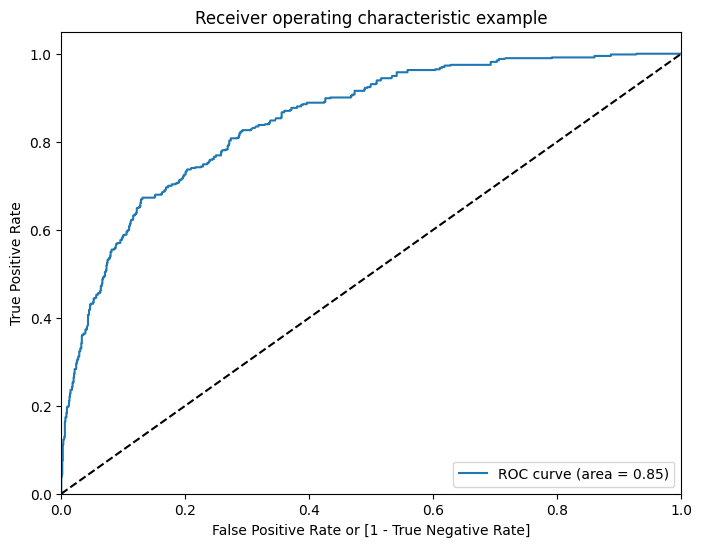

In [61]:
_,_,_,_ = draw_roc_curve( radm_clf, test_X, test_y);

#### GridSearch for Optimal Parameters

In [63]:
tuned_parameters = [{'max_depth': [10, 15],
'n_estimators': [10,20],
'max_features': ['sqrt', 'auto']}]
## Initializing the RF classifier
radm_clf = RandomForestClassifier()
## Configuring search with the tunable parameters
clf = GridSearchCV(radm_clf,
tuned_parameters,
cv=5,
scoring='roc_auc')
## Fitting the training set
clf.fit(train_X, train_y )

,estimator,RandomForestClassifier()
,param_grid,"[{'max_depth': [10, 15], 'max_features': ['sqrt', 'auto'], 'n_estimators': [10, 20]}]"
,scoring,'roc_auc'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,20


In [64]:
clf.best_score_

0.9310717803116099

In [65]:
clf.best_params_

{'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 20}

In [66]:
radm_clf = RandomForestClassifier(max_depth = 15, n_estimators = 20, max_features = 'sqrt')
radm_clf.fit(train_X, train_y)

,n_estimators,20
,criterion,'gini'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


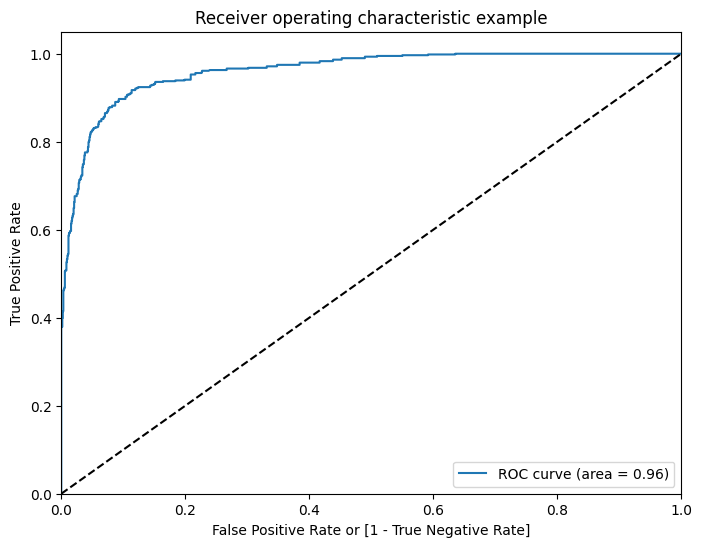

In [67]:
_,_,_,_ = draw_roc_curve( clf, test_X, test_y);

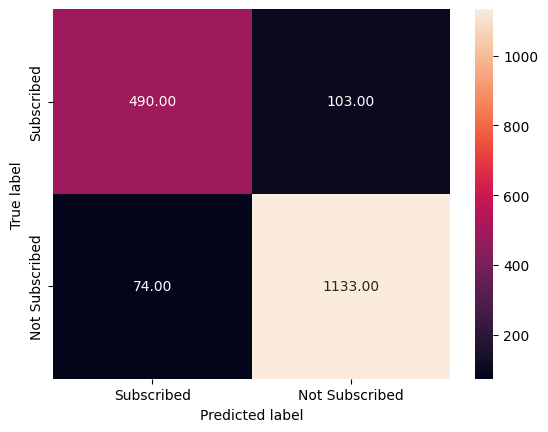

In [68]:
pred_y = radm_clf.predict( test_X )
draw_cm( test_y, pred_y )

In [69]:
print( metrics.classification_report( test_y, pred_y))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1207
           1       0.87      0.83      0.85       593

    accuracy                           0.90      1800
   macro avg       0.89      0.88      0.89      1800
weighted avg       0.90      0.90      0.90      1800



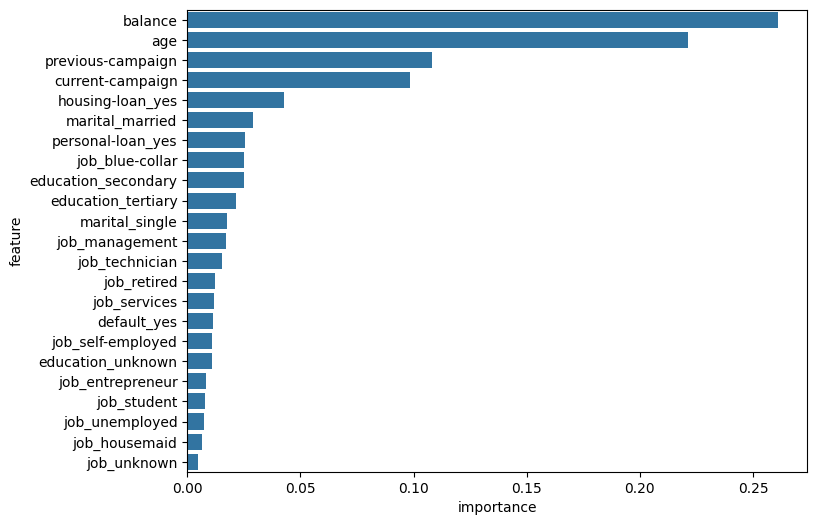

In [70]:
import numpy as np
feature_rank = pd.DataFrame( { 'feature': train_X.columns,
'importance': radm_clf.feature_importances_ } )
feature_rank = feature_rank.sort_values('importance', ascending = False)
plt.figure(figsize=(8, 6))
sns.barplot( y = 'feature', x = 'importance', data = feature_rank );

In [71]:
feature_rank['cumsum'] = feature_rank.importance.cumsum() * 100
feature_rank.head(10)

,feature,importance,cumsum
1,balance,0.260919,26.091922
0,age,0.221430,48.234932
3,previous-campaign,0.108138,59.048696
2,current-campaign,0.098248,68.873493
21,housing-loan_yes,0.042705,73.144029
15,marital_married,0.029029,76.046880
22,personal-loan_yes,0.025572,78.604030
4,job_blue-collar,0.025143,81.118302
17,education_secondary,0.025011,83.619435
18,education_tertiary,0.021412,85.760644


In [72]:
## Importing Gradient Boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
## Initializing Gradient Boosting with 500 estimators and max depth as 10.
gboost_clf = GradientBoostingClassifier( n_estimators=500, max_depth=10)
## Fitting gradient boosting model to training set
gboost_clf.fit(train_X, train_y )

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,500
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,10
,min_impurity_decrease,0.0
,init,None


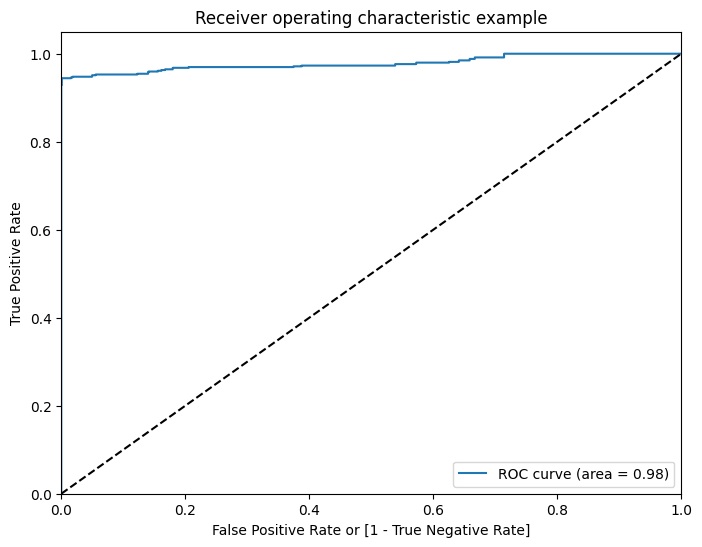

In [73]:
_, _, _, _ = draw_roc_curve( gboost_clf, test_X, test_y )

In [74]:
from sklearn.model_selection import cross_val_score
gboost_clf = GradientBoostingClassifier( n_estimators=500, max_depth=10)
cv_scores = cross_val_score( gboost_clf, train_X, train_y, cv = 10, scoring = 'roc_auc' )

In [75]:
print( cv_scores )
print( "Mean Accuracy: ", np.mean(cv_scores), " with standard deviation of: ",
np.std(cv_scores))

[0.95871173 0.96191327 0.98086735 0.97208877 0.98027403 0.96517451
 0.97000432 0.97704568 0.97020768 0.95091385]
Mean Accuracy:  0.9687201185495932  with standard deviation of:  0.009174466034906178


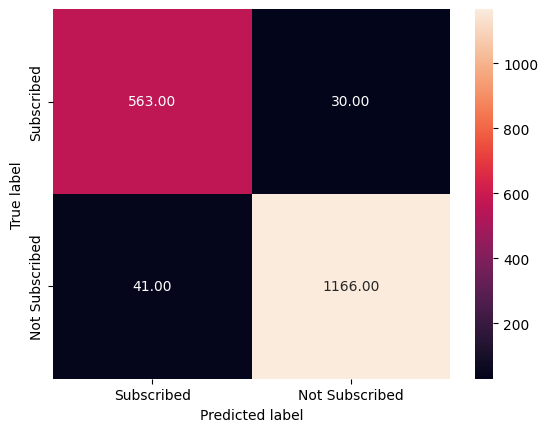

In [76]:
gboost_clf.fit(train_X, train_y )
pred_y = gboost_clf.predict( test_X )
draw_cm( test_y, pred_y )

In [77]:
print( metrics.classification_report( test_y, pred_y ) )

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1207
           1       0.93      0.95      0.94       593

    accuracy                           0.96      1800
   macro avg       0.95      0.96      0.96      1800
weighted avg       0.96      0.96      0.96      1800



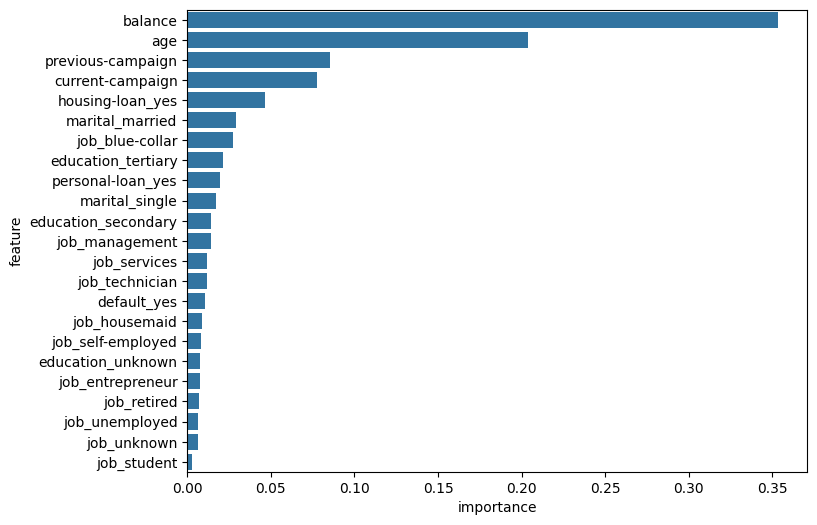

In [78]:
import numpy as np
# Create a dataframe to store the featues and their corresponding importances
feature_rank = pd.DataFrame( { 'feature': train_X.columns, 'importance': gboost_clf.feature_importances_ } )
## Sorting the features based on their importances with most important feature at top.
feature_rank = feature_rank.sort_values('importance', ascending = False)
plt.figure(figsize=(8, 6))
# plot the values
sns.barplot( y = 'feature', x = 'importance', data = feature_rank );